## Esercitazione 5  del    19 Marzo 2024 


## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=0,..,10

- Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
      condizionato per tutti i valori di q assegnati;

- Si calcoli la soluzione x dell'equazione mediante la formula risolutiva indicata al punto precedente e si dica se l'algoritmo di calcolo risulta numericamente
stabile  per i valori di q assegnati

- si individui una forma stabile per il calcolo della soluzione e si verifichi se l'algoritmo di calcolo risulta numericamente stabile per i valori di q assegnati.

In [1]:
import numpy as np
import sympy as sp
import sympy.utilities.lambdify as ldf

#Costanti
p = 10.0**5
q = 10.0**-np.arange(11)

x = sp.symbols("x")
f = -p + sp.sqrt(p**2 + x)
df = sp.diff(f,x,1)
K = df * x / f

#Calcolo della soluzione
fnum = ldf(x,f,np)
print(fnum(q))

print("q =",q)
print("Spacing di p**2 =",np.spacing(p**2), "si perde quindi informazione dopo il sesto q che è minore dello spacing.")
print("Limite di K(x) per x tendente a 0:", sp.limit(K,x,0),"quindi il problema è ben condizionato.")
print("Per ottenere la forma stabile possiamo razionalizzare la funzione della soluzione.")

fsol = x / (p + sp.sqrt(p**2 + x))
fsolnum = ldf(x,fsol,np)
print(fsolnum(q))

[4.99999442e-06 5.00003807e-07 5.00003807e-08 4.99130692e-09
 4.94765118e-10 4.36557457e-11 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
q = [1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09
 1.e-10]
Spacing di p**2 = 1.9073486328125e-06 si perde quindi informazione dopo il sesto q che è minore dello spacing.
Limite di K(x) per x tendente a 0: 1 quindi il problema è ben condizionato.
Per ottenere la forma stabile possiamo razionalizzare la funzione della soluzione.
[5.e-06 5.e-07 5.e-08 5.e-09 5.e-10 5.e-11 5.e-12 5.e-13 5.e-14 5.e-15
 5.e-16]


## Esercizio 2

Realizzate un codice python che implementa il seguente algoritmo. Si tratta dell'implementazione del  metodo di Archimede per l'approssimazione di pi-greco e genera una successione di valori $p_i$, i=1,n, (n scelto dall'utente) che tende a $\pi$. Verificare se all'aumentare di n, la successione $p_i$ tende a $\pi$.

b[0]=2

s[0]=1

for i in range(1,n):

    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
     s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)

- Visualizzate su un grafico gli elementi della successione p[i] calcolata Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i], - considerando come valore esatto di pigreco il valore math.pi.

- Giustificate i risultati alla luce della teoria.

- Proponete una versione stabile dell'algoritmo

- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i] prodotta dall'algoritmo stabilizzato, considerando come valore esatto di
pigreco il valore math.pi.

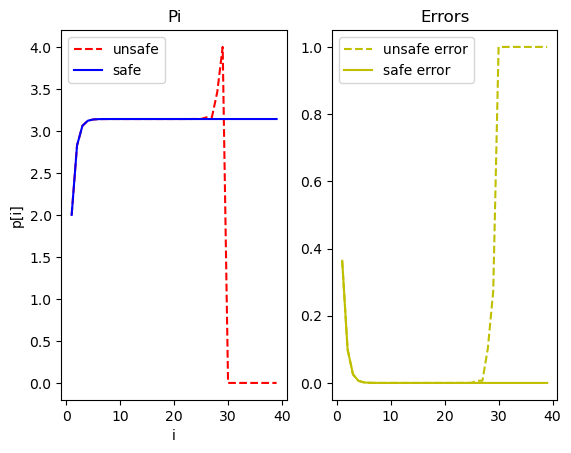

In [2]:
import math
import matplotlib.pyplot as plt

#Dati
n = 40
b = np.zeros((n,))
s = np.zeros((n,))
ss = np.zeros((n,))
bs = np.zeros((n,))
p = np.zeros((n,))
psafe = np.zeros((n,))

b[0] = 2.0
bs[0] = 2.0
ss[0] = 1.0
s[0] = 1.0
#Unsafe
for i in range(1,n):
    p[i] = b[i - 1] * s[i - 1]
    b[i] = 2 * b[i - 1]
    s[i] = np.sqrt((1.0 - np.sqrt(1.0 - s[i-1]**2))/2.0)
#Safe
for i in range(1,n):
    psafe[i] = bs[i - 1] * ss[i - 1]
    bs[i] = 2 * bs[i - 1]
    ss[i] = ss[i - 1] / np.sqrt((2.0 * (1.0 + np.sqrt(1.0 - ss[i - 1]**2))))

erel = np.abs((p - math.pi) / math.pi)
erels = np.abs((psafe - math.pi) / math.pi)

plt.subplot(1,2,1)
plt.plot(np.arange(1,n),p[1:n],"r--",label="unsafe")
plt.plot(np.arange(1,n),psafe[1:n],"b-",label="safe")
plt.legend()
plt.title("Pi")
plt.xlabel("i")
plt.ylabel("p[i]")
plt.subplot(1,2,2)
plt.plot(np.arange(1,n),erel[1:n],"y--",label="unsafe error")
plt.plot(np.arange(1,n),erels[1:n],"y-",label="safe error")
plt.legend()
plt.title("Errors")
plt.show()

## Esercizio 3   
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$.



## Esercizio 4
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

In [22]:
x = sp.symbols("x")
h = sp.symbols("h")
#Derivata
fx = sp.sin(x)
dfx = sp.diff(fx,x,1)
dfxn = ldf(x,dfx,np)
#Rapporto incrementale
rapp = (sp.sin(x + h) - sp.sin(x)) / h
lim = sp.limit(rapp,h,0)
rappn = ldf(x,lim,np)

erel = np.abs((rappn(1) - dfxn(1))/rappn(1))
print(erel)
print("Il limite del rapporto incrementale è uguale alla derivata.",dfx,lim)

0.0
Il limite del rapporto incrementale è uguale alla derivata. cos(x) cos(x)


## Esercizio 5
Valutazione di un polinomio in un vettore di punti
-   Realizzare una function  che mediante lo schema di Horner  valuti un polinomio in un vettore di punti.
-   Realizzare una function  che utilizzi l’algoritmo classico per valutare un polinomio in un vettore di punti.
-   Valutare   i seguenti polinomi, con i due metodi implementati nei punti precedenti,  sul vettore di punti specificato  e  rappresentarli graficamente. Confrontarne i tempi 

         p(x)=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256  da valutare su vettore di  1000000 punti equidistanti in [1.8,2.2]
         p(x)= x^11 –8 x^9 +28 x^6 –7 x^4 +12 x^3 –4 x +1   da valutare su vettore di 1000000  punti in [-5:5]
         
Cosa conferma questo esperimento?


## Esercizio 6
Realizzare un codice python che calcola il valore del polinomio p(x)=(x-2)^8 utilizzando le formule

    p=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256;
    p(x)=(x-2)^8
    e lo schema di Horner

e ne realizza il grafico in un vettore di 10000 equidistanti nell’intervallo [1.8,2.2], [1.9, 2.1],  [1.92,2.08], [1.93,2.07], [1.94,2.06] Spiegare il comportamento osservato. Cosa succede al restringersi dell’intervallo intorno al valore 2, punto in cui questo polinomio si annulla?
